In [3]:
import pandas as pd

# Load the dataset
file_path = 'D:/Data science ass/19/blogs.csv'
blogs_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(blogs_df.head())
print(blogs_df.info())


                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [7]:
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords from NLTK
nltk.download('stopwords')

# Function to clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.split()  # Tokenize the text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Apply the cleaning function to the 'Data' column
blogs_df['Cleaned_Data'] = blogs_df['Data'].apply(clean_text)

# Display the cleaned text
print(blogs_df['Cleaned_Data'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism53485 tal...
Name: Cleaned_Data, dtype: object


In [9]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the cleaned text into TF-IDF features
X = tfidf_vectorizer.fit_transform(blogs_df['Cleaned_Data'])

# The labels
y = blogs_df['Labels']


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8225
                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.87        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88   

In [14]:
from textblob import TextBlob

# Function to get the sentiment of the text
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'Cleaned_Data' column
blogs_df['Sentiment'] = blogs_df['Cleaned_Data'].apply(get_sentiment)

# Display the distribution of sentiments
print(blogs_df['Sentiment'].value_counts())


Positive    1452
Negative     545
Neutral        3
Name: Sentiment, dtype: int64


In [15]:
# Analyze sentiment distribution across categories
sentiment_distribution = blogs_df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()

print(sentiment_distribution)


Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.35      NaN      0.65
comp.graphics                 0.27      NaN      0.73
comp.os.ms-windows.misc       0.24      NaN      0.76
comp.sys.ibm.pc.hardware      0.19      NaN      0.81
comp.sys.mac.hardware         0.26      NaN      0.74
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.21      NaN      0.79
rec.autos                     0.24      NaN      0.76
rec.motorcycles               0.28      NaN      0.72
rec.sport.baseball            0.35      NaN      0.65
rec.sport.hockey              0.40      NaN      0.60
sci.crypt                     0.19      NaN      0.81
sci.electronics               0.25      NaN      0.75
sci.med                       0.34      NaN      0.66
sci.space                     0.28      NaN      0.72
soc.religion.christian        0.25      NaN      0.75
talk.politics.guns          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
Data      0
Labels    0
dtype: int64
                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club... 

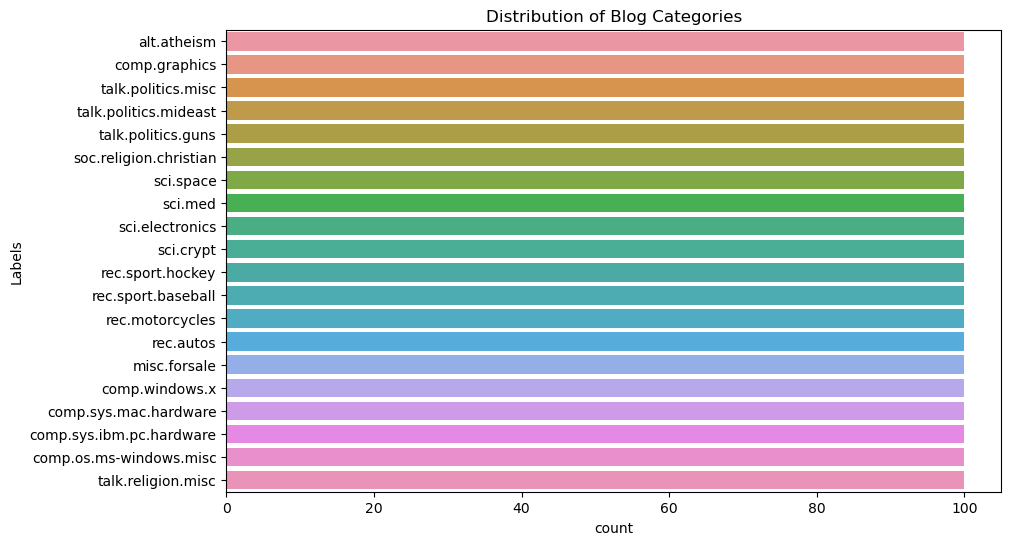

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                      Processed_Text  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset
df = pd.read_csv('D:/Data science ass/19/blogs.csv')

# Display basic information about the dataset
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Remove rows with missing values (if any)
df.dropna(inplace=True)

# Basic statistics of the dataset
print(df.describe())

# Distribution of categories
plt.figure(figsize=(10,6))
sns.countplot(y=df['Labels'], order=df['Labels'].value_counts().index)
plt.title('Distribution of Blog Categories')
plt.show()

# Preprocessing text
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Processed_Text'] = df['Data'].apply(preprocess_text)

# Display the processed text
print(df[['Data', 'Processed_Text']].head())


Accuracy: 0.8083333333333333
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.48      0.96      0.64        24
           comp.graphics       0.78      0.89      0.83        28
 comp.os.ms-windows.misc       0.90      0.85      0.88        33
comp.sys.ibm.pc.hardware       0.83      0.67      0.74        36
   comp.sys.mac.hardware       0.91      0.83      0.87        36
          comp.windows.x       0.94      0.81      0.87        36
            misc.forsale       0.64      0.88      0.74        24
               rec.autos       0.96      0.81      0.88        31
         rec.motorcycles       0.62      0.95      0.75        22
      rec.sport.baseball       0.97      0.91      0.94        32
        rec.sport.hockey       0.92      0.96      0.94        25
               sci.crypt       0.77      1.00      0.87        24
         sci.electronics       0.69      0.74      0.71        27
                 sci.m

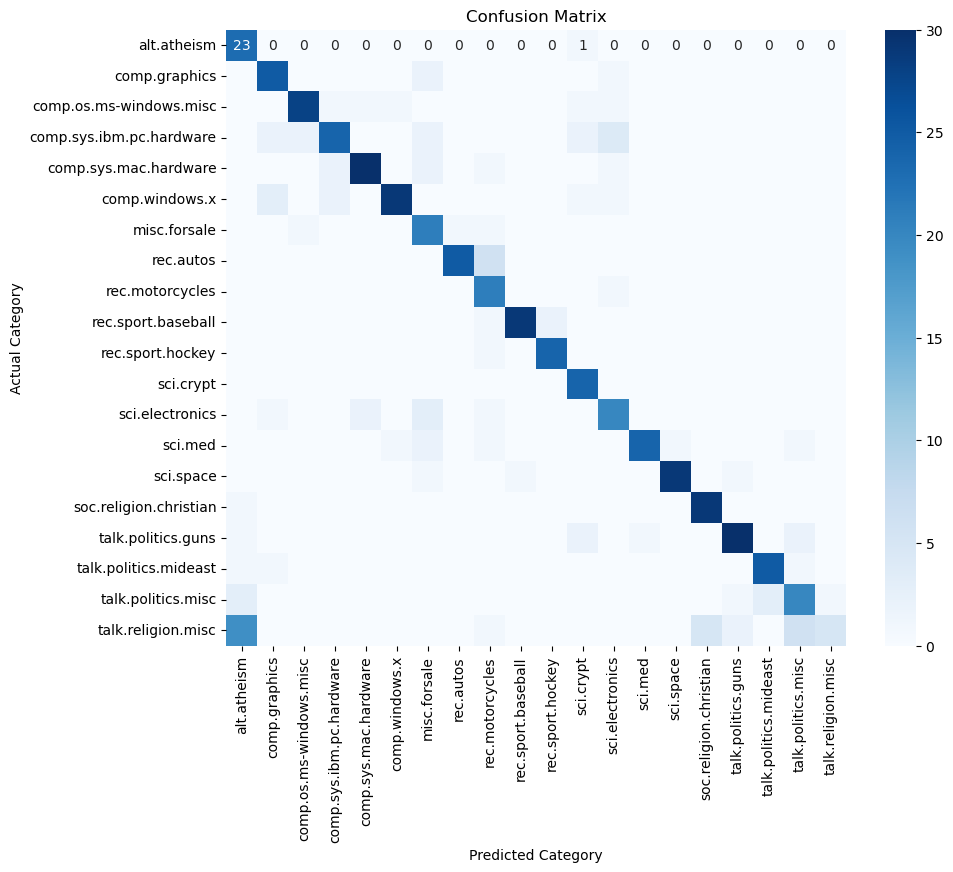

In [19]:
# Encode the labels
label_encoder = LabelEncoder()
df['Encoded_Labels'] = label_encoder.fit_transform(df['Labels'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Encoded_Labels'], test_size=0.3, random_state=42)

# Create a pipeline with TF-IDF and Naive Bayes
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('nb', MultinomialNB())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


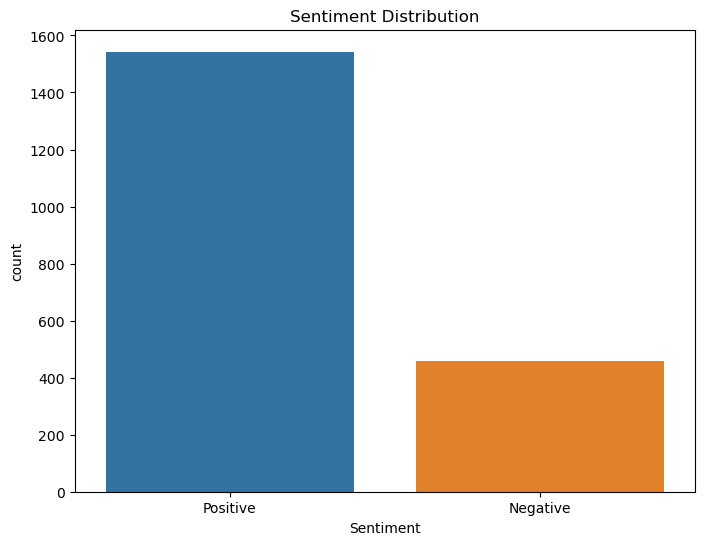

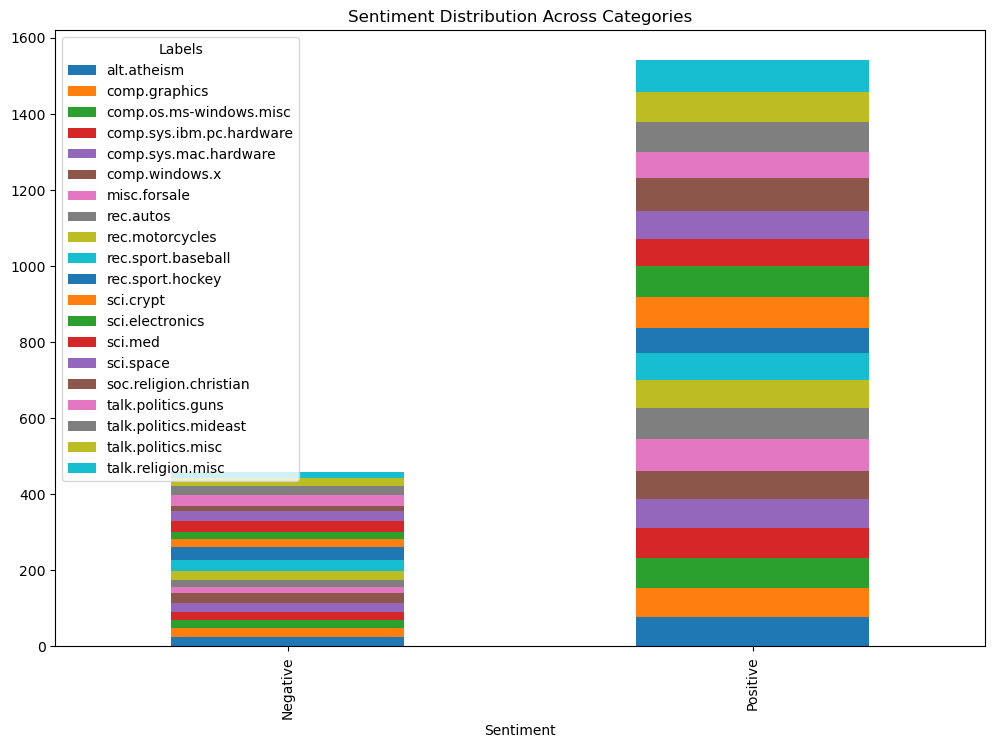

Labels     alt.atheism  comp.graphics  comp.os.ms-windows.misc  \
Sentiment                                                        
Negative            23             24                       22   
Positive            77             76                       78   

Labels     comp.sys.ibm.pc.hardware  comp.sys.mac.hardware  comp.windows.x  \
Sentiment                                                                    
Negative                         20                     24              27   
Positive                         80                     76              73   

Labels     misc.forsale  rec.autos  rec.motorcycles  rec.sport.baseball  \
Sentiment                                                                 
Negative             16         17               26                  29   
Positive             84         83               74                  71   

Labels     rec.sport.hockey  sci.crypt  sci.electronics  sci.med  sci.space  \
Sentiment                                 

In [22]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display sentiment distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Analyze sentiment distribution across categories
sentiment_category = pd.crosstab(df['Sentiment'], df['Labels'])
sentiment_category.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Sentiment Distribution Across Categories')
plt.show()

# Display the sentiment analysis results
print(sentiment_category)


In [23]:
# Reflecting on the model's performance and sentiment analysis
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Detailed Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nSentiment Analysis Results:")
print(sentiment_category)


Model Evaluation:
Accuracy: 0.8083333333333333
Detailed Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.48      0.96      0.64        24
           comp.graphics       0.78      0.89      0.83        28
 comp.os.ms-windows.misc       0.90      0.85      0.88        33
comp.sys.ibm.pc.hardware       0.83      0.67      0.74        36
   comp.sys.mac.hardware       0.91      0.83      0.87        36
          comp.windows.x       0.94      0.81      0.87        36
            misc.forsale       0.64      0.88      0.74        24
               rec.autos       0.96      0.81      0.88        31
         rec.motorcycles       0.62      0.95      0.75        22
      rec.sport.baseball       0.97      0.91      0.94        32
        rec.sport.hockey       0.92      0.96      0.94        25
               sci.crypt       0.77      1.00      0.87        24
         sci.electronics       0.69      0.74      0.71      